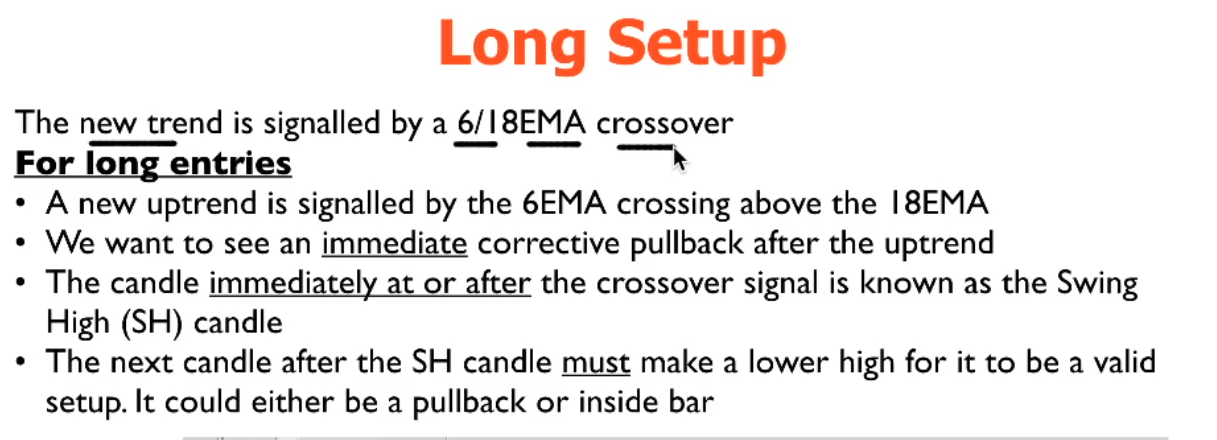


In [3]:
import pandas as pd
import numpy as np
from binance.client import Client
from talib import EMA, CDLHAMMER

import matplotlib.pyplot as plt
import mplfinance as mpf


import datetime
from datetime import datetime

%matplotlib inline


#PLACE SECRETS ON .ENV
secs = open(".env", 'r').read()
secs = dict([i.split("=") for i in secs.split("\n") if i])

PUBLIC = secs["PUBLIC"]
SECRET = secs["SECRET"]

client = Client(api_key=PUBLIC, api_secret=SECRET)

klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_15MINUTE, "10 May 2020" ,"14 May 2020")


In [6]:

df = pd.DataFrame(klines, columns=["Open time", "Open", "High","Low", "Close", "Volume", "Close time", "Quote asset volume", "Number of trades", "tkb", "tkbq","ignore"])

dd = df[['Open time', 'Open', 'Close',"High","Low","Volume"]]

dd = dd.astype({    
    "Close": "float",
    "Open" : "float",
    "High" : "float",
    "Low"  : "float",
    "Volume": "float",
})

dd['Open time'] = dd['Open time'].apply( lambda x: datetime.fromtimestamp(x/1000) ) #timestamps to date %Y%M%D
dd = dd.set_index('Open time') #used by mpf

dd["EMA6"]  = EMA(dd['Close'], timeperiod=6)
dd["EMA18"] = EMA(dd['Close'], timeperiod=18)
dd["Long"]  = np.where(dd["EMA6"] > dd["EMA18"], 1, 0) 
dd["Short"] = np.where(dd["EMA18"] > dd["EMA6"], 1, 0) 
dd["CrossL"] = dd["Long"].diff()
dd["CrossS"] = dd["Short"].diff()

#dd["Cross"].tail(60)
dd["CrossL"] = dd.loc[dd["CrossL"] == 1]
dd["CrossS"] = dd.loc[dd["CrossS"] == 1]


In [5]:
dd["CrossL"] = dd["Long"].diff()
dd["CrossL"]

Open time
2020-05-09 18:00:00    NaN
2020-05-09 18:15:00    0.0
2020-05-09 18:30:00    0.0
2020-05-09 18:45:00    0.0
2020-05-09 19:00:00    0.0
                      ... 
2020-05-13 17:00:00    0.0
2020-05-13 17:15:00    0.0
2020-05-13 17:30:00    0.0
2020-05-13 17:45:00    0.0
2020-05-13 18:00:00    0.0
Name: CrossL, Length: 385, dtype: float64

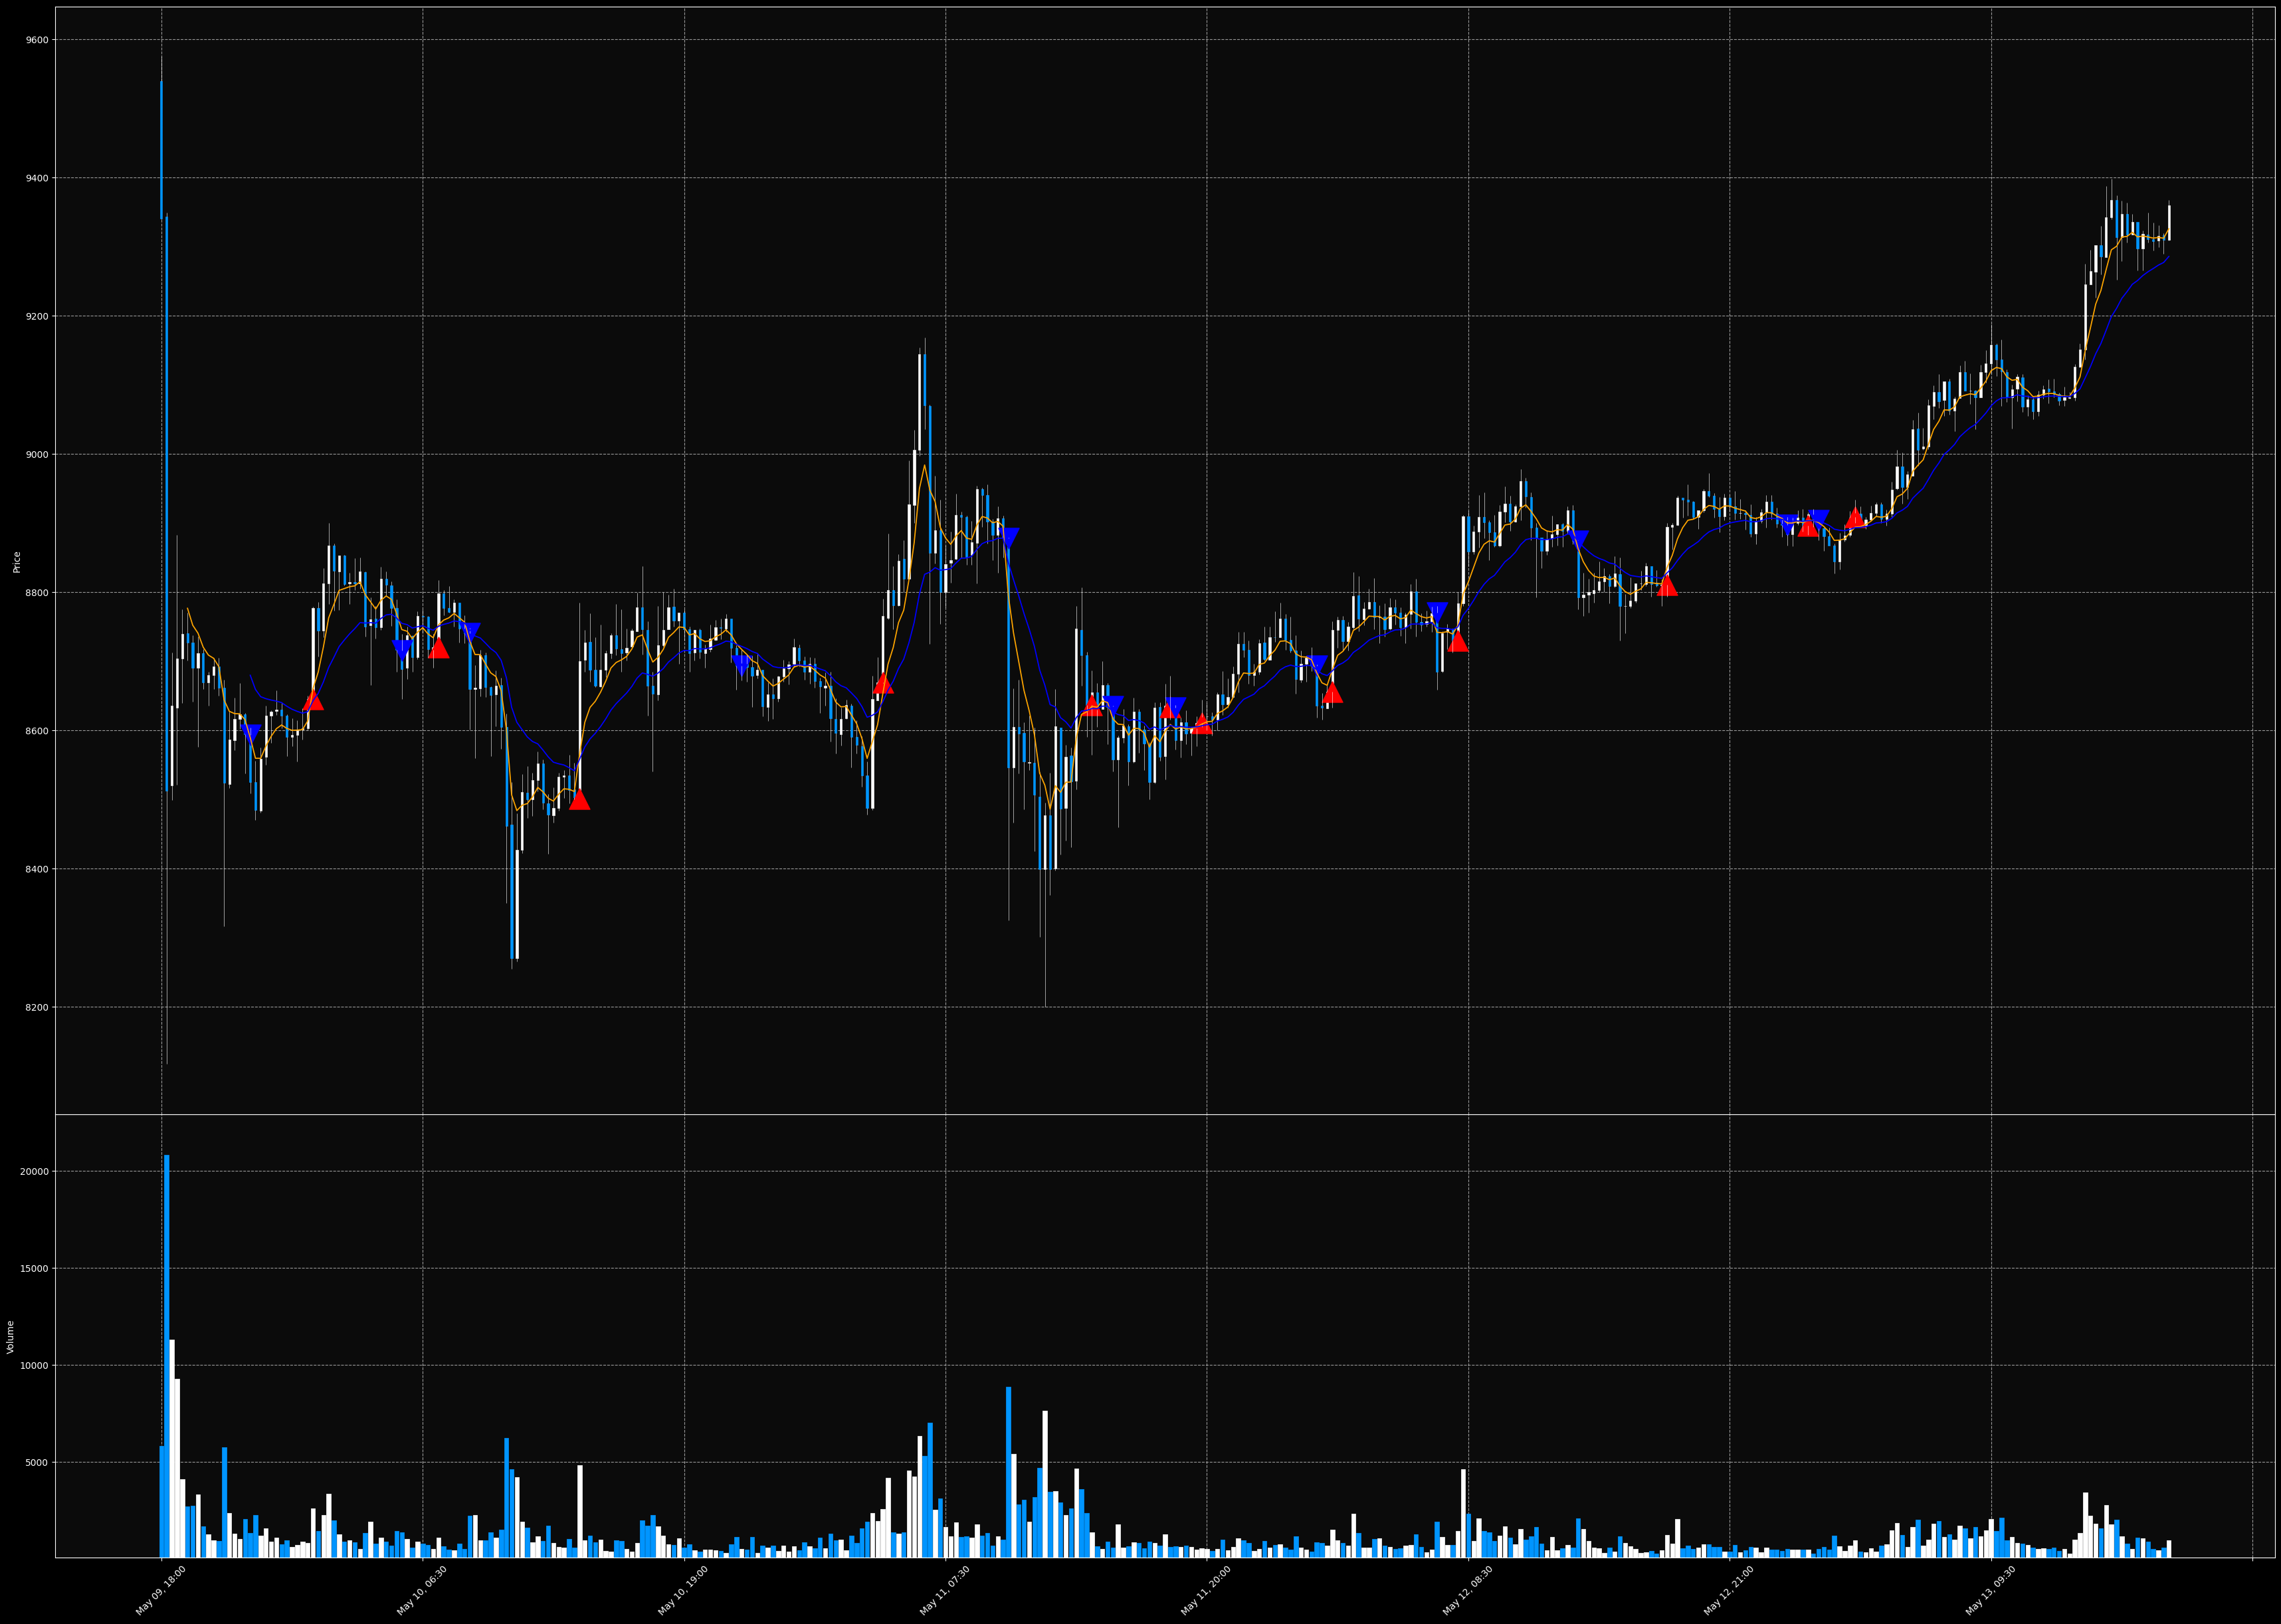

In [7]:
#dd = dd.fillna(0)
#print(dd.tail(100))
EMAS = [mpf.make_addplot(dd["EMA6"],color="orange"),
        mpf.make_addplot(dd["EMA18"],color="blue"),
        mpf.make_addplot(dd["CrossL"],scatter=True,markersize=500,marker='^',color="red"),
        mpf.make_addplot(dd["CrossS"],scatter=True,markersize=500,marker='v',color="blue")]

kargs = dict(type='candle', figscale=5.8, addplot=EMAS )

mpf.plot(dd,**kargs, style='nightclouds',volume=True)



#GET HOW TO MATCH INDEXES

In [26]:
TEST = pd.DataFrame()

TEST = dd.loc["2020-05-11 08:30:00":"2020-05-11 21:00:00"]


TEST["HAMMER"] = CDLHAMMER(TEST["Open"],TEST["High"],TEST["Low"], TEST["Close"])
#HAMMER
TEST
#TEST["Hammer"] = HAMMER

/home/jguerrero/Projects/101/trading/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Open    Close     High      Low       Volume  \
Open time                                                              
2020-05-11 08:30:00  8908.54  8851.18  8910.39  8839.55  1167.034913   
2020-05-11 08:45:00  8853.41  8871.89  8902.82  8839.92  1099.945818   
2020-05-11 09:00:00  8871.57  8948.83  8954.04  8812.14  1793.962838   
2020-05-11 09:15:00  8948.83  8940.00  8951.34  8894.35  1212.832840   
2020-05-11 09:30:00  8940.00  8901.84  8956.01  8870.00  1347.940226   
2020-05-11 09:45:00  8901.84  8882.96  8905.76  8846.61   702.600684   
2020-05-11 10:00:00  8882.97  8907.06  8924.48  8827.86  1191.730329   
2020-05-11 10:15:00  8907.01  8878.11  8910.77  8850.00  1017.282897   
2020-05-11 10:30:00  8878.03  8545.97  8879.10  8325.00  8869.916176   
2020-05-11 10:45:00  8545.97  8604.34  8660.49  8466.00  5403.131337   
2020-05-11 11:00:00  8604.34  8595.04  8672.83  8537.66  2809.201026   
2020-05-11 11:15:00  8596.17  8554.32  8611.58  8485.77  3052.846369   
2020-05-11 11:30:00  8553.29  8554.11  8621.47  8542.46  1936.658392   
2020-05-11 11:45:00  8553.30  8506.76  8604.15  8425.05  3206.852568   
2020-05-11 12:00:00  8503.55  8398.87  8539.38  8301.00  4701.049281   
2020-05-11 12:15:00  8398.83  8476.47  8494.88  8200.00  7635.668711   
2020-05-11 12:30:00  8476.45  8398.83  8538.30  8361.56  3458.871585   
2020-05-11 12:45:00  8400.34  8605.35  8660.00  8397.54  3491.489584   
2020-05-11 13:00:00  8604.20  8486.15  8604.20  8420.07  2913.143270   
2020-05-11 13:15:00  8487.22  8561.20  8578.68  8440.00  2270.380871   
2020-05-11 13:30:00  8563.03  8526.01  8575.00  8431.05  2620.951140   
2020-05-11 13:45:00  8526.71  8746.86  8780.00  8514.14  4676.003822   
2020-05-11 14:00:00  8745.25  8708.74  8807.00  8663.96  3617.833102   
2020-05-11 14:15:00  8708.73  8636.35  8713.35  8590.00  2360.731577   
2020-05-11 14:30:00  8636.33  8654.42  8686.95  8563.94  1374.734839   
2020-05-11 14:45:00  8654.90  8630.16  8668.54  8604.32   652.546275   
2020-05-11 15:00:00  8630.36  8665.67  8700.00  8630.36   543.343974   
2020-05-11 15:15:00  8665.67  8634.11  8668.73  8580.00   915.354921   
2020-05-11 15:30:00  8634.34  8557.31  8635.12  8540.23   603.630941   
2020-05-11 15:45:00  8557.31  8589.84  8591.81  8459.28  1782.778858   
2020-05-11 16:00:00  8589.84  8606.33  8630.46  8581.40   593.647528   
2020-05-11 16:15:00  8605.42  8555.05  8609.01  8519.92   663.453951   
2020-05-11 16:30:00  8555.05  8627.27  8647.35  8552.45   855.838390   
2020-05-11 16:45:00  8627.27  8601.37  8631.01  8567.00   818.743930   
2020-05-11 17:00:00  8600.66  8580.40  8607.14  8542.36   551.377328   
2020-05-11 17:15:00  8579.50  8525.05  8582.57  8500.00   913.473254   
2020-05-11 17:30:00  8525.30  8632.95  8640.31  8523.10   842.256646   
2020-05-11 17:45:00  8633.40  8561.52  8640.21  8555.44   685.965968   
2020-05-11 18:00:00  8562.04  8635.60  8667.65  8528.78  1269.775136   
2020-05-11 18:15:00  8634.02  8633.45  8678.55  8615.11   633.386784   
2020-05-11 18:30:00  8633.07  8585.88  8636.91  8571.63   658.406915   
2020-05-11 18:45:00  8585.46  8611.33  8618.36  8560.71   622.065153   
2020-05-11 19:00:00  8611.34  8595.36  8628.72  8580.06   695.695912   
2020-05-11 19:15:00  8595.73  8603.21  8605.00  8563.87   615.073084   
2020-05-11 19:30:00  8603.21  8610.22  8620.00  8577.00   490.630552   
2020-05-11 19:45:00  8610.52  8619.50  8644.00  8605.00   576.822417   
2020-05-11 20:00:00  8619.96  8620.50  8639.27  8600.00   541.604510   
2020-05-11 20:15:00  8620.50  8615.36  8626.28  8592.00   434.705122   
2020-05-11 20:30:00  8615.36  8652.35  8655.00  8600.00   515.044026   
2020-05-11 20:45:00  8652.35  8637.51  8685.71  8621.77  1013.992609   
2020-05-11 21:00:00  8637.05  8647.91  8675.29  8632.51   468.714813   

                            EMA6        EMA18  Long  Short   CrossL   CrossS  \
Open time                                                                      
2020-05-11 08:30:00  8878.156541  8849.281097  